# INF8775 – Analyse et conception d’algorithmes
# TP3 – Hiver 2024

NIYONKURU, Carine, 1747462

KHNISSI, Zakarya, 1989641

Note finale :

 <u>**Date limite de remise :**</u>  17 avril 23h59 (Groupe B1), 9 avril 23h59 (Groupe B2)

# Instructions

## Rédaction et remise du rapport

- Ce notebook constitue à la fois le sujet du TP, votre code et votre rapport. Il contient déjà du code pour faciliter vos mesures et l'affichage de vos résultats, ainsi qu'un squelette pour votre rapport.

- Complétez directement le notebook, vous êtes libres de créer de nouvelles cellules de code ou de texte. 

- Remettez le fichier du notebook sur Moodle avec le nom `NOM1_MATRICULE1_NOM2_MATRICULE2.ipynb`

- Vous pouvez inclure du code trouvé sur Internet, mais vous devez en mentionner la source, sous peine d'être sanctionnés pour plagiat.

## Mise en situation

Le dernier travail pratique se fera dans le cadre du concours du meilleur algorithme pour la session d'hiver 2024. Vous devez concevoir et implanter un algorithme de votre cru pour résoudre un problème combinatoire. Le classement des équipes déterminera votre note pour la qualité de l'algorithme. Votre algorithme sera exécuté sur 3 exemplaires de notre choix, chacun pendant 1 minute.<br>
Le rapport pour ce dernier travail pratique est assez succinct. Nous vous encourageons à terminer ce travail assez tôt afin de ne pas compromettre votre préparation à vos examens finaux.

## Description du problème

Le problème à résoudre est le suivant : Vous disposez d'un ensemble de blocs de dimensions variées en  hauteur, largeur et  profondeur décris par un triplet $(l, p, h)$ (largeur, profondeur, hauteur). Afin de garantir la stabilité de votre tour, vous devez vous assurer que le bloc que vous ajoutez sur votre tour repose entièrement sur le précédent.

Plus formellement, les contraintes suivantes doivent être respectées :

$$l_{nouveauBloc} \leq l_{blocReceveur}  \text{ et  } p_{nouveauBloc} \leq p_{blocReceveur}$$

On vous demande de construire plusieurs tours en utilisant tous les blocs d'une instance. En plus des contraintes d'équilibre, les tours ne doivent pas dépasser une hauteur maximum H. L'objectif est de minimiser le nombre de tours construites tout en respectant les contraintes décrites précédemment. Il est interdit de faire une rotation des blocs. Vous pouvez vérifier si votre solution est valide avec la fonction suivante :

In [10]:
def check_solution(sample_blocks, H, solution):
    maxHeightOK, blockSmallerOK, allBlocksUsed, onlyGivenBlocks = True, True, True, True
    print(f"Nombre de tours utilisées : {len(solution)}")

    for tower in solution:
        if sum([b[2] for b in tower]) > H:
            maxHeightOK = False
            break
    for t,tower in enumerate(solution):
        for i in range(len(tower) - 1):
            new_block = tower[i + 1]
            receiving_block = tower[i]
            if new_block[0] > receiving_block[0] or new_block[1] > receiving_block[1]:
                blockSmallerOK = False
                break
    print(f"Hauteur maximale non dépassée : {maxHeightOK}\nPas de blocs plus gros reposant sur un plus petit : {blockSmallerOK}")
    
    solution_blocks = [b for t in solution for b in t]
    block_counts = {}
    for b in sample_blocks:
        if b not in block_counts.keys():
            block_counts[b] = 0
        block_counts[b] += 1
    
    for b in solution_blocks:
        if b not in block_counts.keys():
            onlyGivenBlocks = False
            break
        block_counts[b] -= 1
        
    for count in block_counts.values():
        if count > 0:
            allBlocksUsed = False
        if count < 0:
            onlyGivenBlocks = False
        if not (allBlocksUsed and onlyGivenBlocks):
            break
    print(f"Tous les blocs sont utilisés : {allBlocksUsed}\nUniquement les blocs du sample sont utilisés : {onlyGivenBlocks}")

## Exemple

Pour l'exemplaire de 4 blocs suivant : `[(1, 5, 8),(9, 6, 2), (8, 5, 4),(6, 2, 1)]`

On évalue la solution de 2 tours (remarquez la liste de liste) :

```
[
    [(1, 5, 8)],
    [(9, 6, 2),(8, 5, 4), (6, 2, 1)]
]
```

In [3]:
s = [(1, 5, 8), (9, 6, 2), (8, 5, 4), (6, 2, 1)]
check_solution(s, 9, [[(1,5,8)], [(9, 6, 2),(8,5,4),(6,2,1)]])

Nombre de tours utilisées : 2
Hauteur maximale non dépassée : True
Pas de blocs plus gros reposant sur un plus petit : True
Tous les blocs sont utilisés : True
Uniquement les blocs du sample sont utilisés : True


In [4]:
s[0][0:2]

(1, 5)

In [5]:
import numpy as np

l = s = [(9, 6, 8), (9, 6, 2), (8, 5, 4), (6, 2, 1)]

sorted(l, key = lambda x: (-x[0], -x[1], x[2]))

[(9, 6, 2), (9, 6, 8), (8, 5, 4), (6, 2, 1)]

In [6]:
len(s)

4


## Jeu de données

La fonction `generate_sample` ci-dessous permet de générer une liste de N blocs de dimensions variables.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from random import randint

In [9]:
def generate_sample(size, max_width=100, max_depth=100, max_height=20):
    return [
    (randint(1, max_width), randint(1, max_depth), randint(1, max_height))
    for _ in range(size)
    ]

def writeFile(sample, H, filePath):
    f = open(filePath, "w+")
    f.write(f"{H}\n")
    for w, p, h in sample:
        f.write(f"{w} {p} {h}\n")
    f.close()

def readFile(filePath):
    """
    Charger une instance depuis un fichier
    """
    f = open(filePath)
    lines = list(f)
    H = int(lines[0])
    blocks = [
        tuple(map(int, x.split(' ')))
        for x in lines[1:]
    ]
    f.close()
    return H, blocks

Utilisez la cellule ci-dessous pour vous créer des exemplaires de tailles variables, que vous pourrez réaccéder plus tard à l'aide de readFile()

In [19]:
writeFile(generate_sample(size=100, max_width=100, max_depth=100, max_height=10), 15, 'instance1.txt')

## Votre algorithme 

### Présentation

Présentez votre algorithme sous forme de pseudo-code et incluant une analyse de complexité théorique des principales fonctions.

*Insérer votre réponse ici*

### Implémentation

Implémentez votre algorithme ci-dessous. Veillez à respecter le nom de la fonction, ses arguments, ainsi que le format de sortie.

In [3]:
instances = []
for i in range(3):
    H, blocks = readFile(f"instance{i + 1}.txt")
    print("maxHeight :",H, "\nNumber of blocks :",len(blocks),'\n')
    instances.append((H, blocks))

maxHeight : 15 
Number of blocks : 100 

maxHeight : 500 
Number of blocks : 10000 

maxHeight : 800 
Number of blocks : 20000 



In [4]:
def is_smaller(added_block, base_block):
    return added_block[0] <= base_block[0] and added_block[1] <= base_block[1]


def is_too_tall(h, block, tower_h):
    block_height = block[2]
    return h < block_height + tower_h

def b(t):
    return np.minimum(1.5, 1 + 5 / (2 * t))

def loss(num_towers, t):
    return num_towers / b(t)

In [5]:
def solve(blocks, H, maxTime=60, with_print = False):
    """
    Retourne la liste des tours construites.
    Une tour est une liste de bloc, où le bloc tour[i+1] est posé sur le bloc tour[i]
    Un bloc est un tuple (largeur, profondeur, hauteur)
    """
    # init params
    output= [[]]
    tower_number = 0 
    idx = 0
    new_block = ()
    start = time.time()

    # Logically we want a huge base, and if two bases are the same size, we want a shorter height
    # Sorted automatically sorts by priority in the tuple,
    # So it goes L sort, then P sort then H sort
    sorted_input = sorted(blocks.copy(), key = lambda x: (-x[0], -x[1], x[2]))
    
    while True and time.time() - start < maxTime:
        # print(idx)

        if idx <= len(sorted_input)-1:
            new_block = sorted_input[idx]
        else :
            idx = 0
            new_block = sorted_input[idx]
            output.append([])
            tower_number += 1
        

        current_tower = output[tower_number]
        tower_height = np.sum([dimensions[2] for dimensions in current_tower if len(current_tower) > 0])
        # if with_print : 
        #     print("Current list", sorted_input)
        #     print("Selected :", new_block, " Tower height ", new_block[2] + tower_height)
        
        #if it's too tall don't even bother going forward
        if (is_too_tall(H, new_block, tower_height)) :
            idx += 1
            continue
        
        if len(output[tower_number]) == 0:
            current_tower.append(new_block)
            sorted_input.remove(new_block)

        elif is_smaller(added_block = new_block, base_block=current_tower[-1]):
            # if with_print : 
            #     print("All clear add block")
            output[tower_number].append(new_block)
            sorted_input.remove(new_block)
        
        else:
            idx += 1
            

        # if with_print : 
        #     print("Current solution ", output)
        
        if len(sorted_input) < 1 :
            break

    epsilon = 1e-9
    elapsed_time = time.time() - start
    elapsed_time = max(epsilon, elapsed_time)

    b_t = b(elapsed_time)
    score = tower_number / b_t

    print(f"Score: {score:.5f}")
    print(f"Temps écoulé: {elapsed_time:.5f} seconds")

    return output, elapsed_time, score

Instance 1
Score: 25.33333
Temps écoulé: 0.00502 seconds
Nombre de tours utilisées : 39
Hauteur maximale non dépassée : True
Pas de blocs plus gros reposant sur un plus petit : True
Tous les blocs sont utilisés : True
Uniquement les blocs du sample sont utilisés : True

Instance 2
Score: 119.67782
Temps écoulé: 5.31220 seconds
Nombre de tours utilisées : 177
Hauteur maximale non dépassée : True
Pas de blocs plus gros reposant sur un plus petit : True
Tous les blocs sont utilisés : True
Uniquement les blocs du sample sont utilisés : True

Instance 3
Score: 236.09644
Temps écoulé: 19.09945 seconds
Nombre de tours utilisées : 268
Hauteur maximale non dépassée : True
Pas de blocs plus gros reposant sur un plus petit : True
Tous les blocs sont utilisés : True
Uniquement les blocs du sample sont utilisés : True



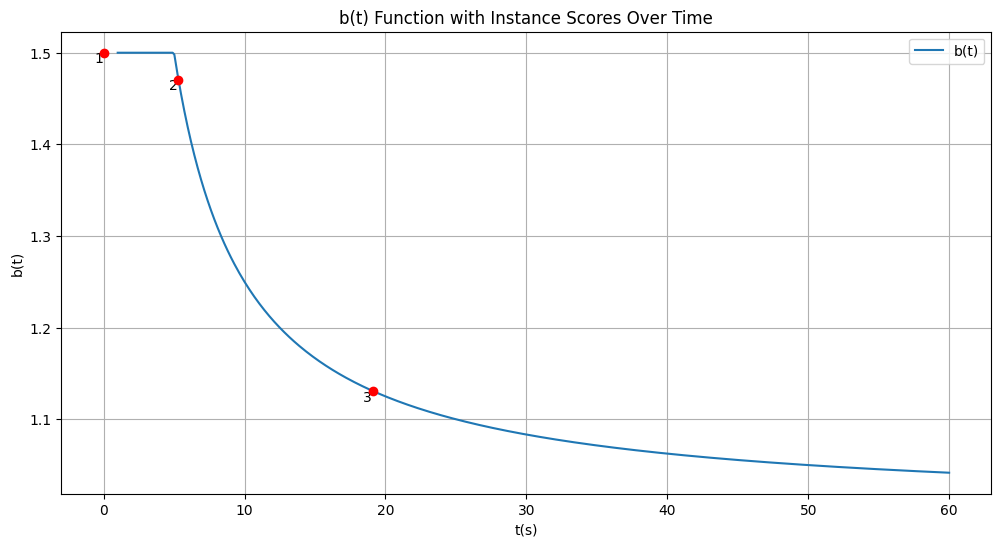

In [11]:
import time
from adjustText import adjust_text
import numpy as np

b_t = b(1.5)
scores = []
times = []
texts = []

T_values = np.linspace(1, 60, 500)
b_values = [b(t) for t in T_values]

plt.figure(figsize=(12, 6))
plt.plot(T_values, b_values, label='b(t)')

for i, (H, blocks) in enumerate(instances):
    print(f"Instance {i + 1}")
    solution, elapsed_time, score = solve(blocks, H)
    scores.append(score)
    times.append(elapsed_time)
    check_solution(blocks, H, solution)
    b_t = min(1.5, 1 + 5 / (2 * elapsed_time))
    print()

plt.scatter(times, [b(t) for t in times], color='red', zorder=5)

for i, (score, time) in enumerate(zip(scores, times)):
    text = plt.text(time, b(time), str(i + 1), ha='center', va='center')
    texts.append(text)

adjust_text(texts,
            only_move={'points':'y', 'texts':'y'},
            arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.xlabel('t(s)')
plt.ylabel('b(t)')
plt.title('b(t) Function with Instance Scores Over Time')
plt.legend()
plt.grid(True)
plt.show()


### Justification des choix de conception

La conception de votre algorithme sera jugé avec les critères suivants:

- Lien avec le contenu du cours
- Originalité
- Initiatives

*Insérer votre réponse ici*

### Votre algorithme est-il certain de trouver une solution optimale ? 

*Insérer votre réponse ici*

## Barême complémentaire

### Qualité de l'algorithme (i.e des solutions) : /4
<p style='text-align: justify;'> 
Vos algorithmes seront testés pendant 1 minute sur 3 exemplaires cachés. D'abord, vous gagnerez 1pt si votre algorithme est capable de battre notre algorithme baseline sur chacun des 3 exemplaires. Les 3 points restants seront distribués en fonction de votre classement par rapport aux autres équipes. Etre dans le premier quartile vous donne 1pt par exemplaire, le 2e quartile 0.75pts etc... et 0.25pts pour le dernier quartile. Ainsi si vous battez la baseline, vous êtes surs d'avoir au minimum 1.75/4 pts pour cette partie. <br>
L'évaluation prend également en compte le temps d'execution, avec une forte bonification pour les algorithmes inférieurs à 5 secondes, et converge vers pas de bonification pour les algorithmes durant 1 minutes : 
</p>

$$ Score = - \frac{N_{towers}}{b(t)} \text{\hspace{0.1cm} avec \hspace{0.1cm}} b(t) = \min(1.5, 1+\frac{5}{2t}) $$

Si votre algorithme ne renvoie pas de solution dans le temps imparti ou que la solution n'est pas valide, alors vous n'obtiendrez pas de point pour cet exemplaire.

Qualité du code : /1

Présentation générale (concision, qualité du français): /1